# This notebook perform EDA for table 32161_0001 (Waste Generation Year Type Amount)

In [48]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
df = pd.read_csv("../../Data/Genesis_Destatis/Waste Generation/cleaned_32161-0001_Waste-Generation-year-type-amount.csv")
df.head()

,Year,EAV Code,Waste Description,Number Of Companies,Amount Of Waste Generated (1000t)
0,2010,EAV-01,waste from the extraction of mineral resources,NaN,NaN
1,2010,EAV-010101-U,Waste from mining v. metal-containing mineral ...,3.0,1.7
2,2010,EAV-010102-U,Waste from mining v. non-metal Mineral resources,3.0,13.7
3,2010,EAV-010304-G,Acid-forming processing residues a. sul. ore,NaN,NaN
4,2010,EAV-010305-G,Other processing residues with hazardous subst...,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Year                               2730 non-null   int64  
 1   EAV Code                           2727 non-null   object 
 2   Waste Description                  2730 non-null   object 
 3   Number Of Companies                2075 non-null   float64
 4   Amount Of Waste Generated (1000t)  2075 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 106.8+ KB


In [111]:
# Standardize waste description for each EAV Code
df['EAV Code'].fillna('EAV', inplace=True)
df['Waste Description'] = df['Waste Description'].str.capitalize()
eav_df = df.groupby('EAV Code', as_index=False).agg({'Waste Description': 'max'})
eav_dict = dict(zip(eav_df['EAV Code'], eav_df['Waste Description']))
df['Waste Description'] = df['EAV Code'].apply(lambda x: eav_dict[x])

In [5]:
len(df['EAV Code'].unique()) # 910

910

# Get wastes (EAV code and description) where both number of companies and amount generated is missing for all 3 years

In [8]:
def NA_EAV(data):
    df = data.loc[~(data['Amount Of Waste Generated (1000t)'].isna() & data['Number Of Companies'].isna())]
    res = set(data['EAV Code'].unique()).difference(set(df['EAV Code'].unique()))
    df1 = data.loc[data['EAV Code'].isin(res)]
    return len(res), tuple(set(zip(df1['EAV Code'], df1['Waste Description'])))

num_EAVcode, NA_EAVs = NA_EAV(df)

In [9]:
NA_EAVs

(('EAV-100508-G', 'Zinc metallurgy: ölh. waste from cooling water tanks'),
 ('EAV-100330-U', 'Waste from treatment of salt slags (oh.100329)'),
 ('EAV-19059900-U', 'Waste not otherwise specified not differentiable'),
 ('EAV-100324-U', 'Solid waste from exhaust gas treatment (oh. 100323)'),
 ('EAV-19120905-U', 'Products for other uses'),
 ('EAV-19119953-U', 'Light heating oil (including diesel), (hl)'),
 ('EAV-050701-G', 'Natural gas cleaning, transport: mercury h. waste'),
 ('EAV-08', 'Waste from hzva, including coatings, adhesives, etc.'),
 ('EAV-101309-G',
  'Asbestos-containing waste a. manufacture. v. asbestos cement'),
 ('EAV-030204-G', 'Inorganic wood preservatives'),
 ('EAV-12', 'Waste from mechanical shaping processes'),
 ('EAV-100808-G', 'Non-ferrous metals: salt slag (first, second smelting)'),
 ('EAV-190402-G', 'Filter dust and other waste from exhaust gas treatment'),
 ('EAV-16021504-G', 'Plastics with brominated flame retardants'),
 ('EAV-190403-G', 'Non-vitrified solid ph

In [83]:
def get_info_from_EAV(data, code):
    return data.loc[data['EAV Code'] == code]

In [84]:
get_info_from_EAV(df, 'EAV-010304-G')

,Year,EAV Code,Waste Description,Number Of Companies,Amount Of Waste Generated (1000t)
3,2010,EAV-010304-G,Acid-forming processing residues a. sul. ore,NaN,NaN
913,2014,EAV-010304-G,Acid-forming processing residues a. sul. ore,NaN,NaN
1823,2018,EAV-010304-G,Acid-forming processing residues a. sul. ore,NaN,NaN


In [142]:
df_notnull = df.dropna(axis=0, subset=['Number Of Companies', 'Amount Of Waste Generated (1000t)'], how='all')
df_notnull

,Year,EAV Code,Waste Description,Number Of Companies,Amount Of Waste Generated (1000t)
1,2010,EAV-010101-U,Waste from mining v. metal-containing mineral ...,3.0,1.7
2,2010,EAV-010102-U,Waste from mining v. non-metal mineral resources,3.0,13.7
10,2010,EAV-010407-G,Waste from further processing non-metal natura...,3.0,1.0
11,2010,EAV-010408-U,Waste from crushed gravel and rock (excluding ...,16.0,140.4
12,2010,EAV-010409-U,Sand and clay waste,15.0,15.9
...,...,...,...,...,...
2723,2018,EAV-200304-U,Faecal sludge,239.0,31.6
2724,2018,EAV-200306-U,Waste from sewer cleaning,151.0,8.7
2725,2018,EAV-200307-U,Bulky waste,2296.0,51.1
2726,2018,EAV-200399-U,Municipal waste n.e.c.,91.0,4.5


## Get top 10 most generated types of waste in year Y
## Get top 10 least generated types of waste in year Y

In [137]:
def topk_generated_waste_year(data, year, k, ascending=False, empty_included=False):
    df1 = data.loc[data['Year'] == year]
    df2 = df1.groupby(['Year', 'EAV Code', 'Waste Description'], as_index=False).agg({'Amount Of Waste Generated (1000t)':'sum'})
    df3 = df2.sort_values(by='Amount Of Waste Generated (1000t)', ascending=ascending)
    if ascending:
        if not empty_included:
            df3 = df3.loc[df3['Amount Of Waste Generated (1000t)'] > 0]
    df3.index = range(0, len(df3))
    df4 = df3.loc[:k-1,['EAV Code','Waste Description', 'Amount Of Waste Generated (1000t)']]
    return df4

In [138]:
# top 10 generated type of waste in 2010
topk_generated_waste_year(df_notnull, 2010, 10)

,EAV Code,Waste Description,Amount Of Waste Generated (1000t)
0,EAV-100101-U,"Rust and. boiler ash, slag, boiler stone (oh.1...",4610.5
1,EAV-030105-U,"Sawdust, chips, cuttings, wood, chipboard. (oh...",2896.0
2,EAV-120102-U,Iron dust and particles,2477.0
3,EAV-170504-U,Soil and stones (without 170503),2376.5
4,EAV-170508-U,Track ballast (without 170507),2147.9
5,EAV-100202-U,Iron and steel ind.: unprocessed slag,1851.9
6,EAV-030310-U,"Fiber waste, fiber, filler and coating sludge",1785.9
7,EAV-150101-U,Paper and cardboard packaging,1656.2
8,EAV-100908-U,Casting molds and sand after casting (without ...,1587.7
9,EAV-120101-U,Iron filings and turnings,1462.6


In [135]:
topk_generated_waste_year(df, 2014, 10)

,EAV Code,Waste Description,Amount Of Waste Generated (1000t)
0,EAV,In total,67871.3
1,EAV-100101-U,"Rust and. boiler ash, slag, boiler stone (oh.1...",5229.4
2,EAV-100117-U,Filter dust from co-incineration of waste (oh....,3623.8
3,EAV-120102-U,Iron dust and particles,3109.9
4,EAV-170504-U,Soil and stones (without 170503),2992.4
5,EAV-030105-U,"Sawdust, chips, cuttings, wood, chipboard. (oh...",2778.6
6,EAV-100908-U,Casting molds and sand after casting (without ...,1814.5
7,EAV-100202-U,Iron and steel ind.: unprocessed slag,1792.2
8,EAV-010308-U,Dusty and powdery waste (without 010307),1761.3
9,EAV-150101-U,Paper and cardboard packaging,1669.4


In [139]:
topk_generated_waste_year(df, 2014, 10, ascending=True)

,EAV Code,Waste Description,Amount Of Waste Generated (1000t)
0,EAV-020109-U,Waste v. chemistry. f.d. agriculture(oh.020108),0.1
1,EAV-140601-G,"Chlorofluorocarbons, hcfcs, hfcs",0.1
2,EAV-200129-G,Detergents containing dangerous substances,0.1
3,EAV-130113-G,Other hydraulic oils,0.1
4,EAV-100199-U,Power plants and other incinerators: waste not...,0.1
5,EAV-080317-G,Waste toner containing hazardous substances,0.1
6,EAV-100817-G,"Non-ferrous metallurgy: sludges, filters k.a.",0.1
7,EAV-080319-G,Dispersion beer,0.1
8,EAV-080399-U,Printing inks: waste n.e.c.,0.1
9,EAV-010504-U,Sludge and waste from freshwater drilling,0.1


In [30]:
topk_generated_waste_year(df, 2018, 10)

,EAV Code,Waste Description,Amount Of Waste Generated (1000t)
0,EAV-100101-U,"Rust and. boiler ash, slag, boiler stone (oh.1...",5384.9
1,EAV-100117-U,Filter dust from co-incineration of waste (oh....,3552.6
2,EAV-030105-U,"Sawdust, chips, cuttings, wood, chipboard. (oh...",2985.1
3,EAV-120102-U,Iron dust and particles,2958.5
4,EAV-170504-U,Soil and stones (without 170503),2687.2
5,EAV-101311-U,Waste from composite materials (excluding 1013...,1932.3
6,EAV-150101-U,Paper and cardboard packaging,1904.0
7,EAV-100908-U,Casting molds and sand after casting (without ...,1854.2
8,EAV-030310-U,"Fiber waste, fiber, filler and coating sludge",1627.5
9,EAV-120101-U,Iron filings and turnings,1562.3


In [140]:
def plot_topk_generated_waste_year(data, year, k, ascending=False):
    df = topk_generated_waste_year(data=data, year=year, k=k, ascending=ascending)
    sns.set_theme()
    fig, ax = plt.subplots(figsize=(10,10))
    sns.barplot(data=df, x='Waste Description', y='Amount Of Waste Generated (1000t)')
    plt.title(f"Top {k} generated types of waste for {year}")
    plt.xticks(rotation=90)

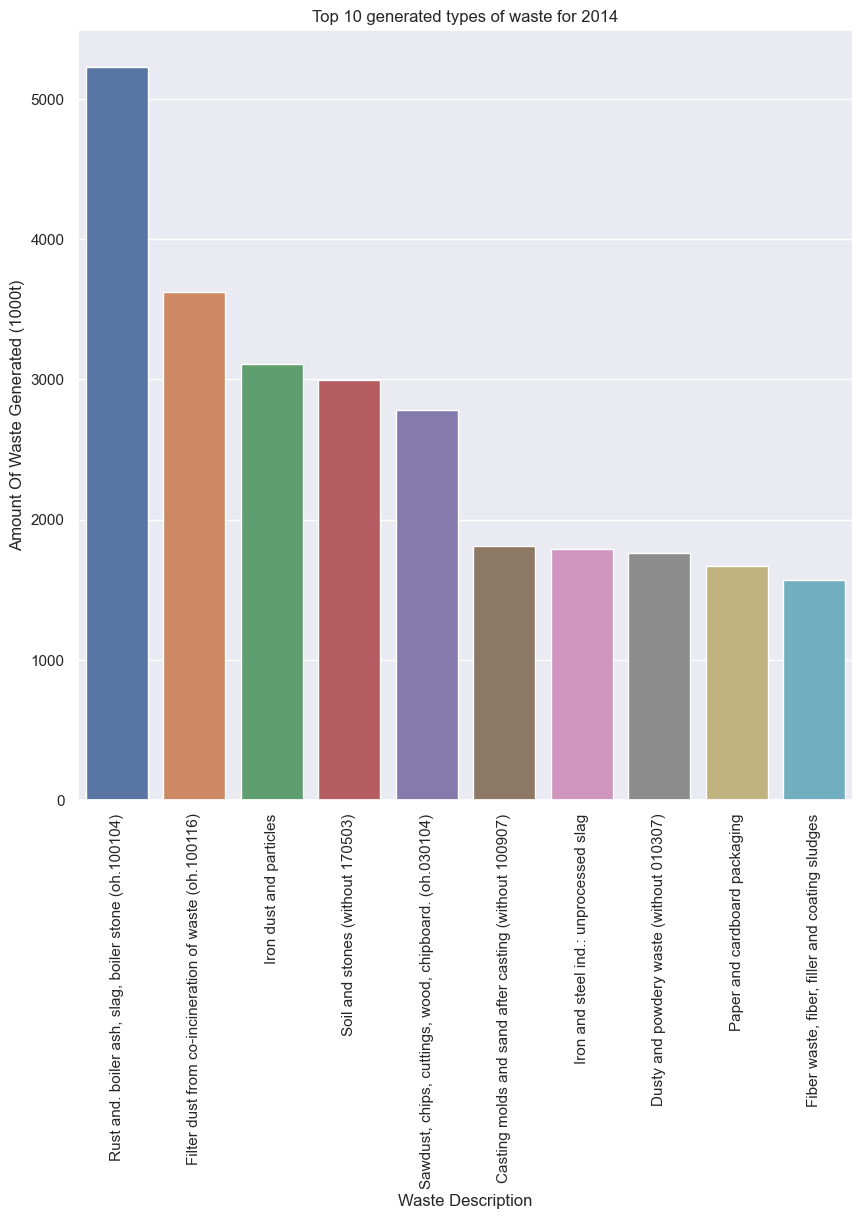

In [141]:
plot_topk_generated_waste_year(df_notnull, 2014, 10)

## Get top 10 most generated types of waste across all years
## Get top 10 least generated types of waste across all years

In [129]:
def topk_generated_waste(data, k, ascending=True, empty_included=False):
    df2 = data.groupby(['EAV Code', 'Waste Description'], as_index=False).agg({'Amount Of Waste Generated (1000t)':'sum'})
    df3 = df2.sort_values(by='Amount Of Waste Generated (1000t)', ascending=ascending)
    if ascending:
        if not empty_included:
            df3 = df3.loc[df3['Amount Of Waste Generated (1000t)'] > 0]
    df3.index = range(0, len(df3))
    df4 = df3.loc[0:k-1,['EAV Code','Waste Description', 'Amount Of Waste Generated (1000t)']]
    return df4

In [132]:
topk_generated_waste(df, 100, ascending=False, empty_included=True)

,EAV Code,Waste Description,Amount Of Waste Generated (1000t)
0,EAV,In total,201116.4
1,EAV-100101-U,"Rust and. boiler ash, slag, boiler stone (oh.1...",15224.8
2,EAV-030105-U,"Sawdust, chips, cuttings, wood, chipboard. (oh...",8659.7
3,EAV-120102-U,Iron dust and particles,8545.4
4,EAV-170504-U,Soil and stones (without 170503),8056.1
...,...,...,...
95,EAV-070208-G,Plastics: reaction and distillation residues,340.5
96,EAV-191212-U,Other waste (without 191211),338.7
97,EAV-190903-U,Slurries from decarbonization,331.8
98,EAV-200102-U,Glas,319.7


In [56]:
def plot_topk_generated_waste(data, k, ascending=False):
    df = topk_generated_waste(data=data, k=k, ascending=ascending)
    sns.set_theme()
    fig, ax = plt.subplots(figsize=(10,5))
    sns.barplot(data=df, x='Waste Description', y='Amount Of Waste Generated (1000t)')
    plt.title(f"Top {k} generated types of waste ")
    plt.xticks(rotation=90)

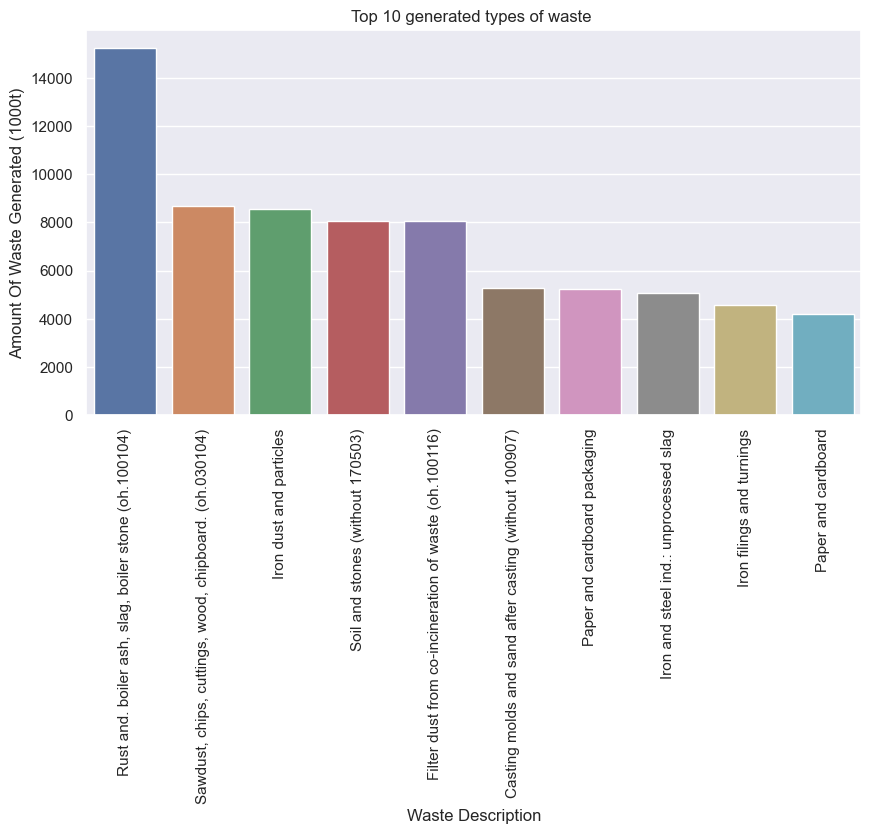

In [58]:
plot_topk_generated_waste(df, 10)

## Get top 10 generated waste with highest percentage increase/decrease in year 2018 and 2014

In [79]:
amt_pivoted_df = pd.pivot_table(df_notnull, values='Amount Of Waste Generated (1000t)', index=['EAV Code', 'Waste Description'], columns='Year').reset_index()
amt_pivoted_df['2014-percInc'] = np.where(amt_pivoted_df[2010] == 0, np.nan, (amt_pivoted_df[2014] - amt_pivoted_df[2010])/amt_pivoted_df[2010])
amt_pivoted_df['2018-percInc'] = np.where(amt_pivoted_df[2014] == 0, np.nan, (amt_pivoted_df[2018] - amt_pivoted_df[2014])/amt_pivoted_df[2014])

In [80]:
def get_topk_percinc(pivot_df, year, k):
    df1 = pivot_df.sort_values(by=f'{year}-percInc', ascending=False)
    df1.index = range(0, len(df1))
    df2 = df1.loc[:k-1,['EAV Code','Waste Description', f'{year}-percInc']]
    return df2

get_topk_percinc(amt_pivoted_df, 2014, 10)

Year,EAV Code,Waste Description,2014-percInc
0,EAV-020599-U,Milk processing: waste n.e.c.,24.500000
1,EAV-160106-U,End-of-life vehicles without dangerous components,14.428571
2,EAV-191106-U,Sludge from operational. waste water treatment...,11.000000
3,EAV-080121-G,Paint or varnish remover waste,10.000000
4,EAV-060499-U,Waste containing metal n.e.c.,9.000000
5,EAV-101304-U,"Waste from calcination, hydration from quicklime",8.207407
6,EAV-101213-U,Ceramic products: sludge (in-house waste water...,7.792271
7,EAV-16012201-U,Metallic components,6.714286
8,EAV-191306-U,Sludge from groundwater remediation (oh.191305),6.333333
9,EAV-100511-U,"Scabies, scum (without 100510)",5.750000


In [81]:
get_topk_percinc(amt_pivoted_df, 2018, 10)

Year,EAV Code,Waste Description,2018-percInc
0,EAV-19120500-U,Mechanical waste treatment: glass cannot be di...,95.000000
1,EAV-120106-G,Halogen-containing mineral oil-based machining...,35.333333
2,EAV-190906-U,Solutions and sludges from regeneration of ion...,25.714286
3,EAV-170901-G,Construction and demolition waste containing m...,25.000000
4,EAV-100325-G,"Aluminum metallurgy: sludge, filter k.a.",14.666667
5,EAV-100118-G,Waste from exhaust gas treatment with hazardou...,6.709677
6,EAV-191004-U,Shredder light fractions and dust (without 191...,6.000000
7,EAV-101099-U,Casting of non-ferrous metals: wastes not othe...,5.666667
8,EAV-020702-U,Beverages: waste from alcohol distillation,4.863548
9,EAV-160508-G,Used organic chemicals,4.200000


## Plot amount generated for a waste across 3 years (bar chart / line chart)

In [123]:
def plot_waste_generated_years(df, eav_code):
    sns.barplot(get_info_from_EAV(df, eav_code), x='Year', y='Amount Of Waste Generated (1000t)')
    plt.title(f"Waste Generated By Year ({eav_dict[eav_code]})")
    plt.ylabel('Amount (1000t)')

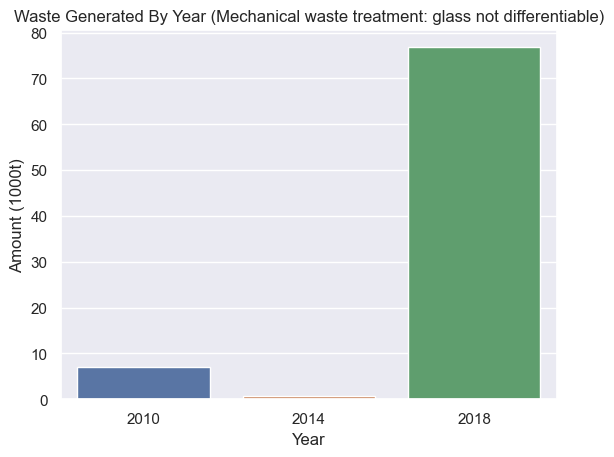

In [124]:
plot_waste_generated_years(df_notnull,'EAV-19120500-U')

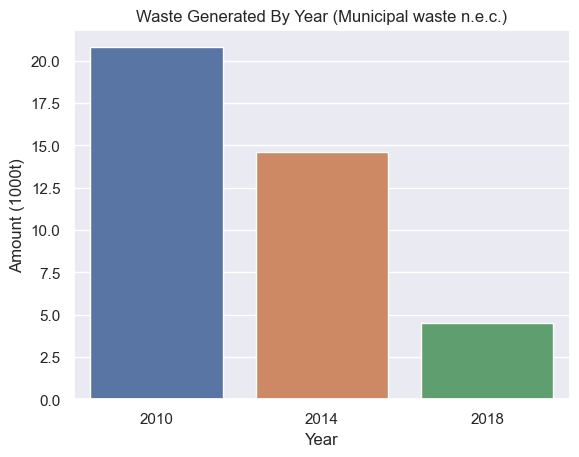

In [125]:
plot_waste_generated_years(df_notnull,'EAV-200399-U')